# Prosper Loan Data Exploration
## by Demagh Mohamed El Amine

This notebook explores [Prosper Marketplace](https://www.prosper.com/)’s loans dataset. Prosper is a website for peer-to-peer lending. Borrowers fill in forms to ask for loans that are presented to potential investors on their webpage. The platform offers loans ranging from 2000\\$ to 40,000\\$. Investors receive yearly interest while Prosper [produces revenue](https://prosper.zendesk.com/hc/en-us/articles/210013193-How-does-Prosper-make-money-) from servicing fees and transaction fees. 

## Table of Contents
- [Data Wrangling](#wrangling) 
- [General Exploration](#general-exploration)
- [Univariate Exploration](#uni-exploration)
- [Bivariate Exploration](#bi-exploration)
- [Multivariate Exploration](#multi-exploration)

<a id = 'wrangling'></a>
## Preliminary Wrangling








In [71]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Assess The Dataset:

In [72]:
# Load the dataset
prosper = pd.read_csv('prosperLoanData.csv')

In [73]:
# Get a visual feel for the data
print(prosper.shape)
prosper.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [74]:
# Get information about the columns
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [75]:
# Get descriptive statistics for the nummerical variables. 
prosper.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [76]:
# Get the values count of ListingCategory
prosper['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

In [77]:
# Get value counts for ProsperRating (Alpha)
prosper['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [78]:
# Get value counts for LoanStatus
prosper.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [79]:
# Get value counts for Term
prosper.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

In [80]:
# Get statistics for LoanOriginalAmount
prosper.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

In [81]:
prosper.LenderYield.describe()

count    113937.000000
mean          0.182701
std           0.074516
min          -0.010000
25%           0.124200
50%           0.173000
75%           0.240000
max           0.492500
Name: LenderYield, dtype: float64

In [82]:
# A list of columns to visalize because the 81 columns can't be displayed
cols = ['ListingKey', 'ListingCategory (numeric)', 'BorrowerAPR', 'BorrowerRate', 
        'MonthlyLoanPayment' ,'ProsperRating (Alpha)','Term', 'LoanStatus','LenderYield', 'LoanOriginalAmount']
# Get the records with a 0 or negative lender yield
prosper[prosper.LenderYield <= 0].head()[cols]

,ListingKey,ListingCategory (numeric),BorrowerAPR,BorrowerRate,MonthlyLoanPayment,ProsperRating (Alpha),Term,LoanStatus,LenderYield,LoanOriginalAmount
15993,C25A3406939968877C77DD2,1,0.01823,0.01,56.42,NaN,36,Chargedoff,0.000,2000
29859,75DB3366773363492DDD729,0,0.01650,0.00,27.78,NaN,36,Completed,-0.005,1000
33287,6F723403076471690BBA7CE,0,0.01657,0.01,112.83,NaN,36,Completed,0.000,4000
37201,303A34319537963605965C9,5,0.02998,0.01,26.91,NaN,36,Completed,0.000,1500
38187,7D5D3393593671475950A37,0,0.01657,0.01,95.06,NaN,36,Completed,0.000,5000


The zero and negative LenderYields appear to belong to valid loans. The interest rate on these loans is below 1 and due to the subtraction of Prosper service fees (of 1% after 2009), the lender yield ends up negative. 

In [83]:
# Get the records with with a null ClosedDate
no_closed_date = prosper[prosper.ClosedDate.isna()]
print(no_closed_date.info())
# Get the value counts for LoanStatus for this data
no_closed_date.LoanStatus.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58848 entries, 1 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ListingKey                           58848 non-null  object 
 1   ListingNumber                        58848 non-null  int64  
 2   ListingCreationDate                  58848 non-null  object 
 3   CreditGrade                          0 non-null      object 
 4   Term                                 58848 non-null  int64  
 5   LoanStatus                           58848 non-null  object 
 6   ClosedDate                           0 non-null      object 
 7   BorrowerAPR                          58848 non-null  float64
 8   BorrowerRate                         58848 non-null  float64
 9   LenderYield                          58848 non-null  float64
 10  EstimatedEffectiveYield              58848 non-null  float64
 11  EstimatedLoss              

Current                   56576
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

The null values in `ClosedDate` represent loans that haven't finished yet. Either ongoing, past-due or in the final payment.

**Issues:**

- `LoanOriginationDate` is a string.
- `ClosedDate` is  a string
- Missing values for `ListingCategory (numeric)` represented by 0
- Impractical column names for `ListingCategory (numeric)` and `ProsperRating (Alpha)`
- Missing values for `ProsperRating (Alpha)`.
- `Term` is an integer but takes only three values 12, 36 and 60.
- `ProsperRating (Alpha)` is a string.

### Clean The Dataset:

In [84]:
# Get a copy of the original dataframe.
clean_prosper = prosper.copy()

**LoanOriginationDate column is a string.**

**Define:**

- Change `LoanOriginationDate` datatype to datetime.
- Change `ClosedDate` datatype to datetime.


**Code:**

In [85]:
# Convert ClosedDate datatype to datetime
clean_prosper.ClosedDate = pd.to_datetime(clean_prosper.ClosedDate)
# Convert LoanOriginationDate datatype to datetime
clean_prosper.LoanOriginationDate = pd.to_datetime(clean_prosper.LoanOriginationDate)

**Test:**

In [86]:
clean_prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  object        
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

**Impractical column names for `ListingCategory (numeric)` and `ProsperRating (Alpha)`**

**Define**
- Rename `ListingCategory (numeric)` to `listing_category_num`
- Rename `ProsperRating (Alpha)` to `prosper_rating_alpha`

**Code**

In [87]:
clean_prosper.rename(columns={'ListingCategory (numeric)': 'listing_category_num',
                              'ProsperRating (Alpha)': 'prosper_rating_alpha'}, inplace=True)

**Test**

In [88]:
clean_prosper.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'prosper_rating_alpha',
       'ProsperScore', 'listing_category_num', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBan

**Missing values for ListingCategory (numeric) represented by 0**

**Define**

Delete records with missing listing category.

**Code**

In [89]:
clean_prosper = clean_prosper[clean_prosper.listing_category_num > 0]

**Test**

In [90]:
sum(clean_prosper.listing_category_num == 0)

0

**Missing values for `ProsperRating (Alpha)`**

**Define**

Delete records with missing Prosper rating.

**Code**

In [91]:
clean_prosper = clean_prosper[clean_prosper.prosper_rating_alpha.notna()]

**Test**

In [92]:
sum(clean_prosper.prosper_rating_alpha.isna())

0

**`Term` is an integer but takes only three values 12, 36 and 60.**

**`ProsperRating (Alpha)` is a string.**

**Define**

Convert both `Term` and `ProsperRating (Alpha)` to categorical datatypes.

**Code**

In [93]:
# Create an ordered categorical data type for prosper rating
# The order goes from: 
# less risky investment -------> riskier investment
# 'AA', 'A', 'B', 'C', 'D', 'E', 'HR'
ordinal_prosper_rating = pd.api.types.CategoricalDtype(ordered=True, 
                                                       categories=['AA', 'A', 'B', 'C', 'D', 'E', 'HR' ])
# Set the new data type to prosper rating
clean_prosper.prosper_rating_alpha = clean_prosper.prosper_rating_alpha.astype(ordinal_prosper_rating)
# Create an ordered categorical data type for term
# 12 months < 36 months < 60 months
ordinal_term = pd.api.types.CategoricalDtype(ordered=True, categories=[12, 36, 60])
# Apply this datatype to term
clean_prosper.Term = clean_prosper.Term.astype(ordinal_term)

**Test**

In [94]:
clean_prosper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84833 entries, 1 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ListingKey                           84833 non-null  object        
 1   ListingNumber                        84833 non-null  int64         
 2   ListingCreationDate                  84833 non-null  object        
 3   CreditGrade                          0 non-null      object        
 4   Term                                 84833 non-null  category      
 5   LoanStatus                           84833 non-null  object        
 6   ClosedDate                           25998 non-null  datetime64[ns]
 7   BorrowerAPR                          84833 non-null  float64       
 8   BorrowerRate                         84833 non-null  float64       
 9   LenderYield                          84833 non-null  float64       
 10  Estimated

<a id = 'general-exploration'></a>
## General Exploration

Since its relaunch in 2009, Prosper changed drastically its policy to comply with new regulations for online financial activities. Because this report aims to inform today's investors, it will only consider loans originated after 2009.

In [95]:
clean_prosper = clean_prosper[clean_prosper.LoanOriginationDate >= '2009-01-01']
print(clean_prosper.shape)
clean_prosper.sort_values(by = 'LoanOriginationDate').head()['LoanOriginationDate']

(84833, 81)


39013    2009-07-20
60401    2009-07-22
18374    2009-07-22
109683   2009-07-23
86631    2009-07-24
Name: LoanOriginationDate, dtype: datetime64[ns]

Select only the columns of interest from our dataset. (`ListingKey`, `listing_category_num`, `prosper_rating_alpha`, `LoanOriginalAmount`, `Term`, `LenderYield`, `LoanOriginationDate`, `ClosedDate` and `LoanStatus`)

In [96]:
# Create a list for the columns of interest
cols = ['ListingKey', 'listing_category_num' ,'prosper_rating_alpha','Term', 'LoanStatus','LenderYield', 'LoanOriginalAmount', 'LoanOriginationDate', 'ClosedDate']
# Get a dataframe with these columns
clean_prosper = clean_prosper[cols]
clean_prosper.head()

,ListingKey,listing_category_num,prosper_rating_alpha,Term,LoanStatus,LenderYield,LoanOriginalAmount,LoanOriginationDate,ClosedDate
1,10273602499503308B223C1,2,A,36,Current,0.0820,10000,2014-03-03,NaT
3,0EF5356002482715299901A,16,A,36,Current,0.0874,10000,2012-11-01,NaT
4,0F023589499656230C5E3E2,2,D,36,Current,0.1985,15000,2013-09-20,NaT
5,0F05359734824199381F61D,1,B,60,Current,0.1214,15000,2013-12-24,NaT
6,0F0A3576754255009D63151,1,E,36,Current,0.2612,3000,2013-04-18,NaT


In [97]:
clean_prosper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84833 entries, 1 to 113936
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ListingKey            84833 non-null  object        
 1   listing_category_num  84833 non-null  int64         
 2   prosper_rating_alpha  84833 non-null  category      
 3   Term                  84833 non-null  category      
 4   LoanStatus            84833 non-null  object        
 5   LenderYield           84833 non-null  float64       
 6   LoanOriginalAmount    84833 non-null  int64         
 7   LoanOriginationDate   84833 non-null  datetime64[ns]
 8   ClosedDate            25998 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 5.3+ MB


There are null values in `ClosedDate` column because many loans are still current.

### What is the structure of your dataset?

There are 113937 loans in the dataset with 81 columns. Most of the columns are numeric, others are strings and there are some Booleans. 

This dataset captures two periods of Prosper. A pre-2009 period before the creation of laws for online loans and a post-2009 where Prosper changed its business model to adapt to the new laws. 84997 loans originated after 2009 and they are the most interesting to this report.   

The Prosper Rating variable represents the risk score of investing in a loan. It’s an ordinal categorical variable.

(less risky) -----> (riskier)

AA, A, B, C, D, E, HR  



### What is/are the main feature(s) of interest in your dataset?

This analysis will focus on discovering the features that can best predict the loan status (if the borrower completes the payment or fails).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The loan amount, the term, Prosper rating (risk), listing category and lender yield could all influence the loan status.

These variables were selected for two main reasons:

1 - They are intuitive:
- Loan amount: a bigger loan maybe be harder to pay. 
- The loan term: a short loan can be harder to pay.
- Listing category: someone who's borrowing money for treatment may already be in a complicated financial situation.
- Lender yield: if the investor takes a higher return from his loan, it will increase the monthly payment for the borrower.

2 - They are the first features that are presented to an investor when asked to lend money for a loan. The picture below shows how loans are presented to potential investors.

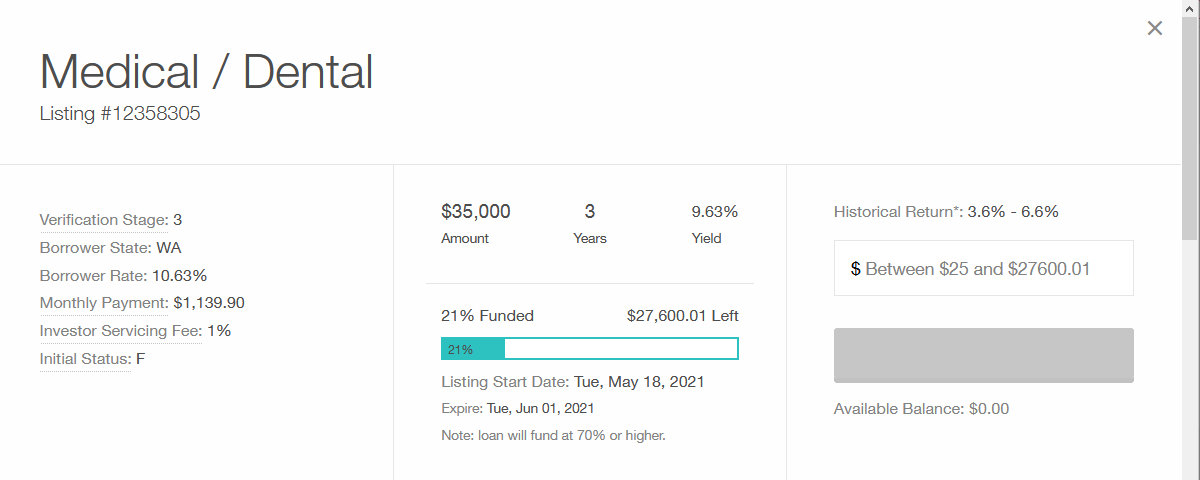

In [98]:
from IPython.display import Image
Image(filename='prosper_loan.png') 

For the following analysis, loan category names will be needed. They will be created from the `listing_category_num` column. It contains numbers that map to the names of loan categories. 

In [99]:
# Create a dictionary to map the numbers of listing category column to their names.
listing_cat_num_to_alpha = {
    1:'Debt Consolidation',
    2:'Home Improvement',
    3:'Business',
    4:'Personal Loan',
    5:'Student Use',
    6:'Auto',
    7:'Other',
    8:'Baby&Adoption',
    9:'Boat',
    10:'Cosmetic Procedure',
    11:'Engagement Ring',
    12:'Green Loans',
    13:'Household Expenses',
    14:'Large Purchases',
    15:'Medical/Dental',
    16:'Motorcycle',
    17:'RV',
    18:'Taxes',
    19:'Vacation',
    20:'Wedding Loans'
}
# Create a new column for the listing category names.
clean_prosper['listing_category_alpha'] = clean_prosper.listing_category_num.apply(lambda x: listing_cat_num_to_alpha[x])

To get uniform plots, a single base color will be used. 

In [100]:
# Get the base color for all the plots
base_color = sb.color_palette()[0]

<a id = 'uni-exploration'></a>    
## Univariate Exploration

Univariate analysis for categorical variables usually requires drawing a bar chart for the counts of each level of the variable and/or its percentages. The function below summarizes these steps in a single call.

In [101]:
def describe_category(data, cat, order, nrows, ncols, size, color = sb.color_palette()[0],
                      xlabel_rotation = 0, oritentation = 'v'):
    '''Calculate the counts and percentages of the values of a categorical
    variable, print them and draw bar charts representing them
    
    Parameters
    ----------
    data : pandas.DataFrame
        A pandas dataframe that contains the category to plot
        
    cat : str
        The name of the category to plot
    
    order : list
        The order of the levels of the plotted category
        
    nrows : int
        The number of rows for the figure object that will be used to draw the plots
        
    ncols : int
        The number of columns for the figure object that will be used to draw the plots
        
    size : (float, float)
        The width and height of the figure that will be used to draw the plots
        
    color : matplotlib color, default: first color of seaborn's color palette
        The color to use for the plots
        
    xlabel_rotation : int, default : 0
        The angle (in degrees) of rotation of the xticks of the plot
        
    oritentation : 'v' | 'h', default : 'v'
        Indicate the orientation of the bars. Draw vertical bars for 'v' 
        and horizontal bars for 'h'
    
    '''
    # Get plot axes
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = size)
    # Get category counts
    counts = data.groupby(cat).count().iloc[:,0]
    print('__Counts__')
    print(counts.sort_values(ascending=False))
    # Get percentages
    percent = counts / data.shape[0]
    print('__Percentage__')
    print(percent.sort_values(ascending=False))
    # Draw a countplot for the categories
    if oritentation == 'v':
        sb.countplot(data=data, x = cat, order= order, ax= ax[0], color= color)
        # Draw barplot for percentages
        sb.barplot(x = percent.index, y = percent, order= order, ax=ax[1], color= color)
        ax[1].set_ylabel('Percentage')
    # Set xticklabels rotation
        ax[0].set_xticklabels(ax[0].get_xticklabels() ,rotation= xlabel_rotation)
        ax[1].set_xticklabels(ax[1].get_xticklabels() ,rotation= xlabel_rotation)
        
    elif oritentation == 'h':
        sb.countplot(data=data, y = cat, order= order, ax= ax[0], color= color)
        # Draw barplot for percentages
        sb.barplot(y = percent.index, x = percent, order= order, ax=ax[1], color= color)
        ax[1].set_xlabel('Percentage')
    # Set xticklabels rotation
        ax[0].set_yticklabels(ax[0].get_yticklabels() ,rotation= xlabel_rotation)
        ax[1].set_yticklabels(ax[1].get_yticklabels() ,rotation= xlabel_rotation)
        


There are 11 levels in `LoanStatus` : Current, Completed, Chargedoff, Defaulted, Past Due (1-15 days), Past Due (31-60 days),  Past Due (61-90 days), Past Due (91-120 days), Past Due (16-30 days), FinalPaymentInProgress, Past Due (>120 days)

This analysis will mostly focus on the outcome of a loan (Current or Completed) rather than intermediate stages. This is why a subset of the data for only these two values will be saved for later use.

In [102]:
clean_prosper_final = clean_prosper.query("LoanStatus == 'Completed' or LoanStatus == 'Chargedoff'")

**Loan Status**


The dates of the first and last finalized loans are given to clarify the duration over which those loans were made. 

In [103]:
# Get the non null closed dates
non_null_closed_date = clean_prosper_final.ClosedDate
print('The date of the first finalized loan is: ' + str(min(non_null_closed_date)))
print('The date of the last finalized loan is: ' + str(max(non_null_closed_date)))

The date of the first finalized loan is: 2009-08-27 00:00:00
The date of the last finalized loan is: 2014-03-10 00:00:00


__Counts__
LoanStatus
Current                   56564
Completed                 19657
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      303
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: ListingKey, dtype: int64
__Percentage__
LoanStatus
Current                   0.666769
Completed                 0.231714
Chargedoff                0.062900
Defaulted                 0.011847
Past Due (1-15 days)      0.009501
Past Due (31-60 days)     0.004279
Past Due (61-90 days)     0.003690
Past Due (91-120 days)    0.003572
Past Due (16-30 days)     0.003124
FinalPaymentInProgress    0.002417
Past Due (>120 days)      0.000189
Name: ListingKey, dtype: float64


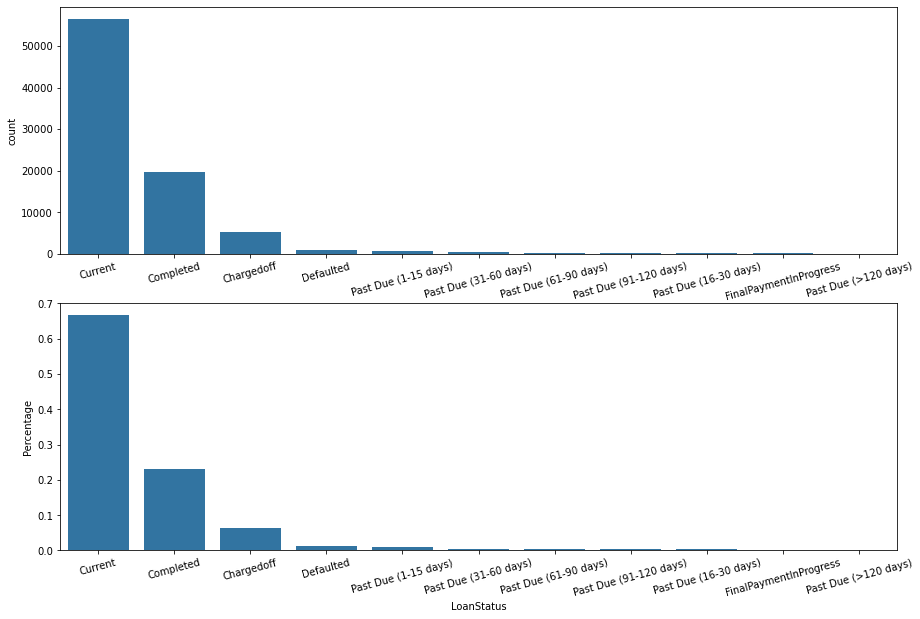

In [104]:
# Use the index of value counts for order
order = clean_prosper.LoanStatus.value_counts().index
# Describe the LoanStatus variable
describe_category(clean_prosper, 'LoanStatus',order , 2, 1,[15,10], xlabel_rotation=15)

Between 2009-08-27 and 2014-03-10, there were 66.67% current loans, 23.17% completed, and 6.29% charged off.

3.87% are divided between past-due, defaulted, and final payment loans.

__Counts__
LoanStatus
Completed     19657
Chargedoff     5336
Name: ListingKey, dtype: int64
__Percentage__
LoanStatus
Completed     0.7865
Chargedoff    0.2135
Name: ListingKey, dtype: float64


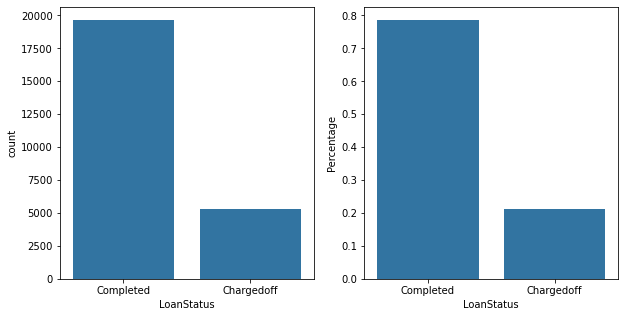

In [105]:
# Plot the counts and percentages for loans that have a final outcome. Either completed of charged off
describe_category(clean_prosper_final, 'LoanStatus', ['Completed', 'Chargedoff'], 1, 2,[10,5])

Among the loans with an outcome, there were 78.65% completed loans and 21.35% charged-off loans. This means that over 5 years, 1/5 of the loans were charged off.

**Loan Term**

__Counts__
Term
36    58676
60    24544
12     1613
Name: ListingKey, dtype: int64
__Percentage__
Term
36    0.691665
60    0.289321
12    0.019014
Name: ListingKey, dtype: float64


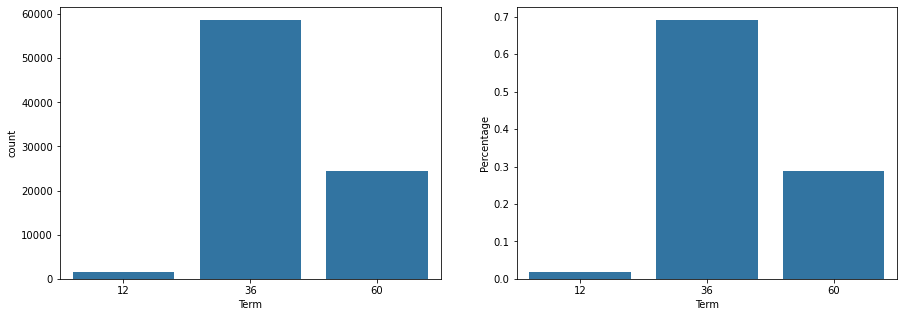

In [106]:
# Describe loan term variable
describe_category(clean_prosper, 'Term', None, 1, 2,[15,5])

Between 2009-08-27 and 2014-03-10, 36 months-term loans were the most common loans with 69.16%, followed by 60 months-term loans (28.93%) and 12 months-term loans (1.90%). 

**Listing Category**

__Counts__
listing_category_alpha
Debt Consolidation    53180
Other                  9218
Home Improvement       6801
Business               5298
Auto                   2237
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Motorcycle              304
Student Use             274
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingKey, dtype: int64
__Percentage__
listing_category_alpha
Debt Consolidation    0.626879
Other                 0.108661
Home Improvement      0.080169
Business              0.062452
Auto                  0.026369
Household Expenses    0.023529
Medical/Dental        0.017941
Taxes                 0.010432
Large Purchases       0.010326
Wedding Loans         0.009088
Vacation              0.009053
Motorcycle            0.

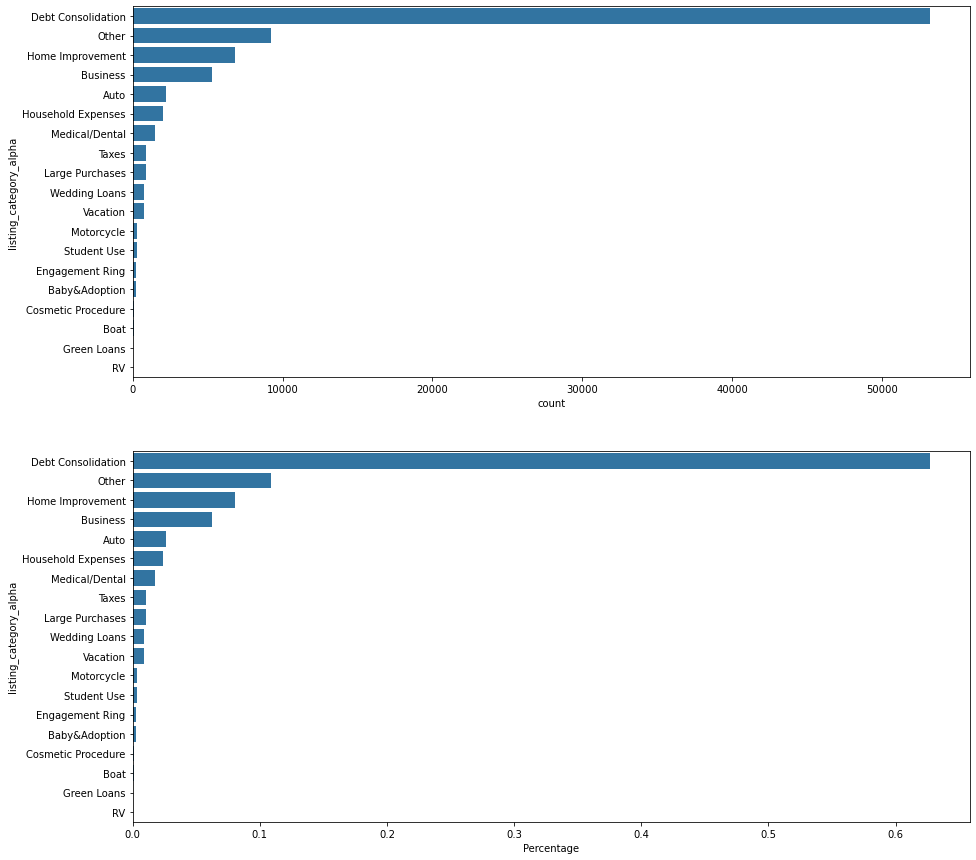

In [107]:
# Use value counts index as the order for creating a countsplot
order = clean_prosper.listing_category_alpha.value_counts().index
# Draw a bar chart for the counts and the percentages of listing categories
describe_category(clean_prosper, 'listing_category_alpha', order, 2, 1, [15, 15], oritentation='h')

Listing categories can be divided into 'common categories' that represent at least 1% of the data and 'rare categories' that represent less than 1%.

Common categories include debt consolidation which is by far the most common listing category with (62.68%). Followed by other (10.86%), home improvement (8.01%), business (6.24%), auto (2.63%), household expenses (2.35%), medical/dental (1.79%), taxes (1.04%) and large purchases (1.03%). 

These categories represent 96.63% of all the data. The remaining 3.37% are divided between the other 10 rare categories.

**Prosper Rating**

__Counts__
prosper_rating_alpha
C     18343
B     15580
A     14550
D     14268
E      9789
HR     6932
AA     5371
Name: ListingKey, dtype: int64
__Percentage__
prosper_rating_alpha
C     0.216225
B     0.183655
A     0.171513
D     0.168189
E     0.115391
HR    0.081713
AA    0.063313
Name: ListingKey, dtype: float64


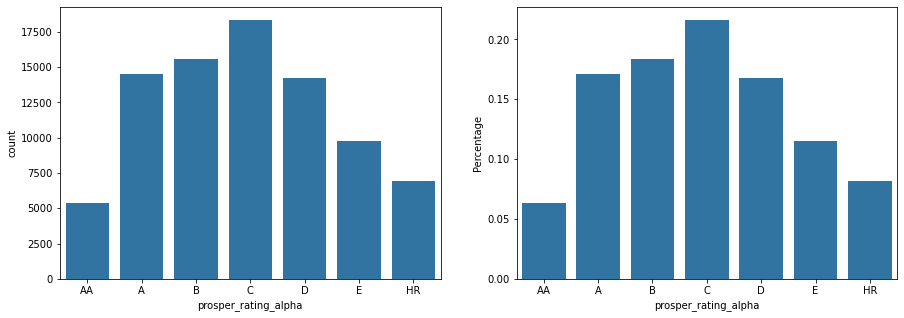

In [108]:
# Draw a bar chart for the counts and the percentages of prosper score
describe_category(clean_prosper, 'prosper_rating_alpha', None, 1, 2, [15, 5], oritentation='v')

The count of Prosper rating increases from AA to C then decreases from C to HR. 

The most common one is C (21.62%). The least common rating is AA (6.33%). The other ratings are roughly centered around C. 

**Loan Amount**

Text(0, 0.5, 'Count')

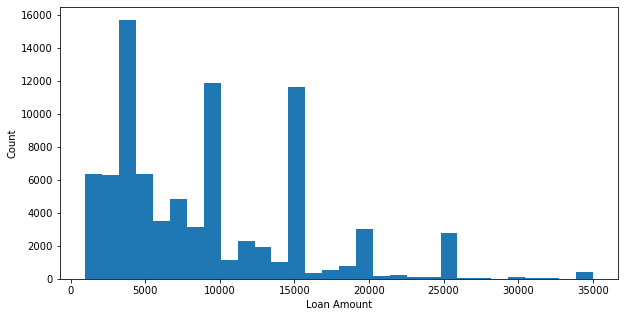

In [109]:
# Create a histogram for loan amount
plt.figure(figsize=[10, 5])
plt.hist(data = clean_prosper, x = 'LoanOriginalAmount', bins = 30)
plt.xlabel('Loan Amount')
plt.ylabel('Count')

The distribution of loan amount is right-skewed with several peaks between [2k - 5k], [5k - 10k], around 15k, 20k, and 25k.

For more clarity, `LoanOriginalAmount` will be plotted on a log scale. 

In [110]:
# Get descriptive statistics on the log of loan amount
np.log10(clean_prosper.LoanOriginalAmount).describe()

count    84833.000000
mean         3.849677
std          0.319960
min          3.000000
25%          3.602060
50%          3.875061
75%          4.130334
max          4.544068
Name: LoanOriginalAmount, dtype: float64

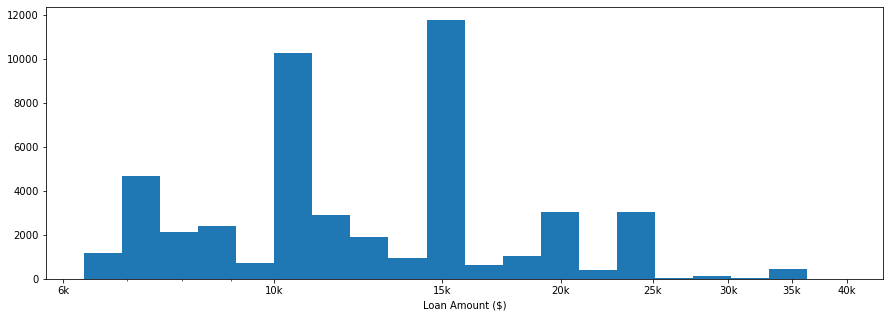

In [111]:
# Create the bins
bin_size = 0.04
bins = 10 ** np.arange(3.8, 4.6 + bin_size, bin_size)
# Plot the histogram on a log scale
plt.figure(figsize=[15, 5])
plt.hist(data = clean_prosper, x = 'LoanOriginalAmount', bins = bins)
ticks = [6000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]
labels = ['6k', '10k', '15k', '20k', '25k', '30k', '35k', '40k']
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Loan Amount ($)');

Plotted on a log-scale, the distribution of loan amount looks bimodal, with two major peaks: one around 10k and the other around 15k but we also find the previous minor peaks: between [6k - 10k], around 20k and 25k.


**Lender Yield**

<AxesSubplot:xlabel='LenderYield', ylabel='Count'>

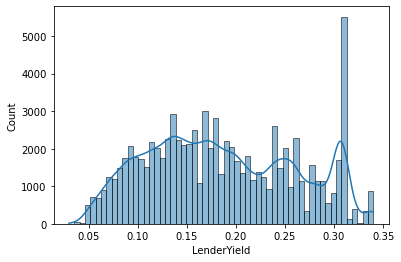

In [112]:
sb.histplot(data = clean_prosper, x = 'LenderYield', kde = True)

The distribution of lender yield is bimodal, with one narrow peak around 0.3 and a second large peak (more like an area) between 0.1 and 0.2. There's also a minor peak around 0.3. 

To get more information about what causes the narrow peak, a plot of the area between 0.3 and 0.35 will be created.

(0.3, 0.35)

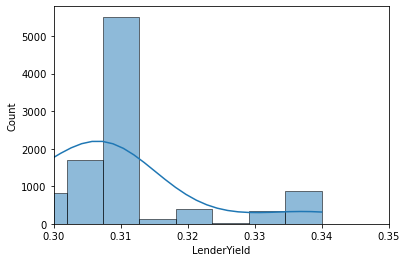

In [113]:
# Zoom in the part of the narrow peak
sb.histplot(data = clean_prosper, x = 'LenderYield', kde = True)
plt.xlim(0.3, 0.35)

After zooming in the narrow peak, it appears that it is due to the values around 0.31.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Loan status has two types of values: 

Values for the outcome of a loan: completed or charged-off 

Intermediate values for loans that have not been paid off yet:  Current, Defaulted, Past Due (1-15 days), Past Due (31-60 days),  Past Due (61-90 days), Past Due (91-120 days), Past Due (16-30 days), FinalPaymentInProgress, Past Due (>120 days).

Because I selected the loans originated after Prosper policy change in 2009, I only have 5 years of loan data from 2009-08-27 to
2014-03-10. During this period, most of the loans are still pending (66.67%). Only 29.46% of the loans have an outcome  (23.17% completed, and 6.29% charged off). When I took the loans with an outcome separately, I found that 1/5 were charged-off (21.35% for 78.65% completed). 



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


* Among the 19 values of `ListingCategory`, 9 of them represented (96.63%) of the data with debt consolidation representing (62.68%). Each of the 10 other categories represented less than 1%. This distribution allowed me to divide the listing categories into common with at least 1% of the data and rare with less than 1%. My report will focus on the common ones.

* The distribution of loan amount was left-skewed. After plotting it on a log scale, it looked bimodal with one peak around 10k and the other around 15k.


<a id = 'bi-exploration' ></a>
## Bivariate Exploration


For the bivariate analysis of the categorical variables, grouped bar charts will be the predominant visualization. The following function draws two grouped bar charts: 
one for the counts and the other for the percentages. It is a variation of the function that was used previously for the univariate analysis.

In [114]:
def describe_two_categories(data, cat, hue, order, hue_order, nrows, ncols, size, label_rotation = 0, oritentation = 'v',
                           hue_colors = "tab10"):
    '''Calculates the counts and percentages of "hue" within "cat" then
    draw bar charts to represent them.
    
    Parameters
    ----------
    data : pandas.DataFrame
        A pandas dataframe that contains the category to plot
        
    cat : str
        The name of the category to plot on the x-axis
    
    hue : str
        The name of the category to plot with hue
    
    order : list
        The order of the levels of the plotted category
        
    hue_order : list
        The order the levels of hue
        
    nrows : int
        The number of rows for the figure object that will be used to draw the plots
        
    ncols : int
        The number of columns for the figure object that will be used to draw the plots
        
    size : (float, float)
        The width and height of the figure that will be used to draw the plots
        
    label_rotation : int, default : 0
        The angle (in degrees) of rotation of the xticks of the plot
        
    oritentation : 'v' | 'h', default : 'v'
        Indicate the orientation of the bars. Draw vertical bars for 'v' 
        and horizontal bars for 'h'
        
            
    hue_colors : matplotlib color, default: seaborn's color palette "tab10"
        The color to use for the hue    
    '''
    # Get plot axes
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize = size)
    # Get category counts
    counts = data.groupby([cat, hue]).count().iloc[:,0]
    print('__Counts__')
    print(counts)
    # Get percentages
    percent = counts / data.groupby(cat).count().iloc[:,0]
    print('__Percentage__')
    print(percent)
    # Draw a countplot for the categories
    if oritentation == 'v':
        sb.countplot(data=data, x = cat, hue = hue,order= order, ax= ax[0], palette= hue_colors)
        # Covert percent to a dataframe
        percent = percent.reset_index() 
        # Draw barplot for percentages
        sb.barplot(data = percent, x = cat, y = percent.columns[2], hue = hue, order= order, 
                   hue_order = hue_order, ax =ax[1], palette= hue_colors )
        ax[1].set_ylabel('Percentage Of Each Category')
    # Set xticklabels rotation
        ax[0].set_xticklabels(ax[0].get_xticklabels() ,rotation= label_rotation)
        ax[1].set_xticklabels(ax[1].get_xticklabels() ,rotation= label_rotation)
        
    elif oritentation == 'h':
        sb.countplot(data=data, y = cat, hue = hue,order= order, ax= ax[0], palette= hue_colors)
        # Covert percent to a dataframe
        percent = percent.reset_index() 
        # Draw barplot for percentages
        sb.barplot(data = percent, y = cat, x = percent.columns[2], hue = hue, order= order, hue_order = hue_order, ax=ax[1],
                  palette= hue_colors)
        ax[1].set_xlabel('Percentage Of Each Category')
        # Set yticklabels rotation
        ax[0].set_yticklabels(ax[0].get_yticklabels() ,rotation= label_rotation)
        ax[1].set_yticklabels(ax[1].get_yticklabels() ,rotation= label_rotation)    

**Loan Term vs. Loan Status**

__Counts__
Term  LoanStatus
12    Chargedoff       72
      Completed      1449
36    Chargedoff     4178
      Completed     15784
60    Chargedoff     1086
      Completed      2424
Name: ListingKey, dtype: int64
__Percentage__
Term  LoanStatus
12    Chargedoff    0.047337
      Completed     0.952663
36    Chargedoff    0.209298
      Completed     0.790702
60    Chargedoff    0.309402
      Completed     0.690598
Name: ListingKey, dtype: float64


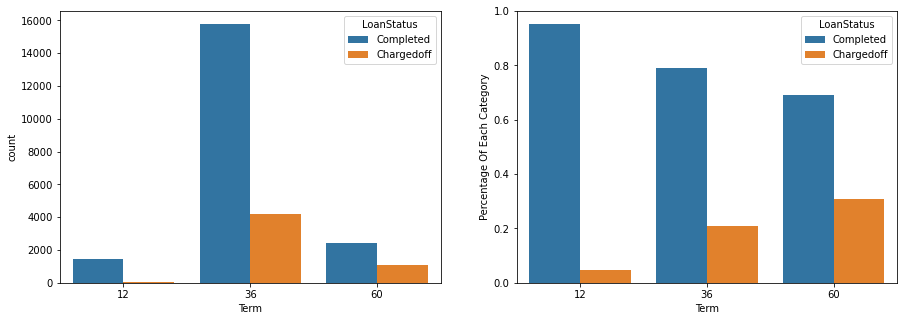

In [115]:
describe_two_categories(clean_prosper_final, 'Term', 'LoanStatus', None,
                        ['Completed', 'Chargedoff'], 1, 2, [15, 5])

The percentage of charged-off loans within each term increases with the increase of the term. 12-months loans have the lowest percentage of charged-offs (4.73%), followed by 36-months loans (20.92%) and 60-months loans with the highest percentage (30.94%).

**Listing Category vs. Loan Status**

__Counts__
listing_category_alpha  LoanStatus
Auto                    Chargedoff     212
                        Completed      955
Baby&Adoption           Chargedoff      13
                        Completed       27
Boat                    Chargedoff       3
                        Completed       25
Business                Chargedoff     593
                        Completed     1665
Cosmetic Procedure      Chargedoff       9
                        Completed       34
Debt Consolidation      Chargedoff    2459
                        Completed     9753
Engagement Ring         Chargedoff       6
                        Completed       57
Green Loans             Chargedoff       8
                        Completed       10
Home Improvement        Chargedoff     524
                        Completed     2000
Household Expenses      Chargedoff     203
                        Completed      371
Large Purchases         Chargedoff      41
                        Completed      135
Medical/

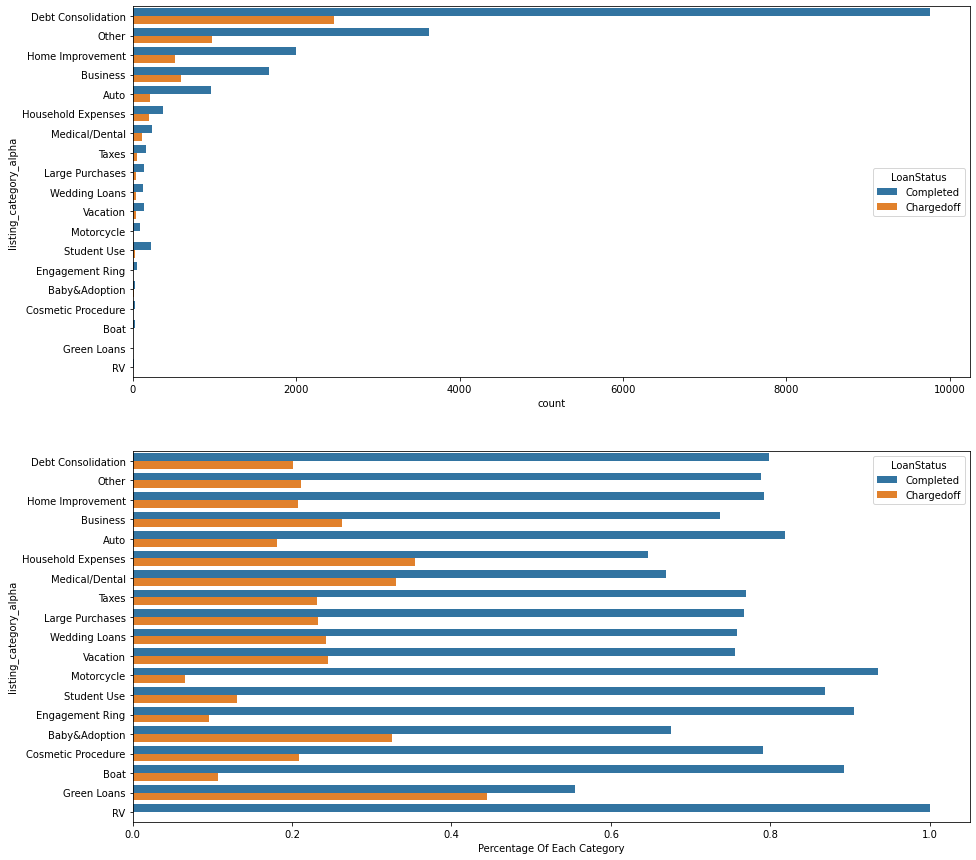

In [116]:
# Use value counts index as the order for creating a countsplot
order = clean_prosper.listing_category_alpha.value_counts().index
describe_two_categories(clean_prosper_final, 'listing_category_alpha', 'LoanStatus', order,
                        ['Completed', 'Chargedoff'], 2, 1, [15, 15], oritentation='h')

To help the interpretation of the plots, a table containing the percentages of charged-off loans for each category will be created. It will only include the common categories and will be presented in ascending order. 

In [117]:
# Get percentages of completed and chargedoff loans in each listing category
percent = clean_prosper_final.groupby(['listing_category_alpha', 'LoanStatus']).count() / clean_prosper_final.groupby('listing_category_alpha').count()
# Keep only one column
percent = percent['ListingKey']
# Convert percent type to dataframe
percent = percent.reset_index()
# Get a subset of percent with only the chargedoffs
chargedoff = percent[percent.LoanStatus == 'Chargedoff']
# Get a list of the 9 most common listing categories
common_cat = clean_prosper.listing_category_alpha.value_counts().index[0:9] 
# Print a list of chargedoff percentages for the 9 most common categories in ascending order
category_raking_by_chargedoff = chargedoff[chargedoff.listing_category_alpha.isin(common_cat)].sort_values(by = 'ListingKey')
category_raking_by_chargedoff

,listing_category_alpha,LoanStatus,ListingKey
0,Auto,Chargedoff,0.181662
10,Debt Consolidation,Chargedoff,0.201359
16,Home Improvement,Chargedoff,0.207607
26,Other,Chargedoff,0.211363
31,Taxes,Chargedoff,0.230769
20,Large Purchases,Chargedoff,0.232955
6,Business,Chargedoff,0.262622
22,Medical/Dental,Chargedoff,0.330532
18,Household Expenses,Chargedoff,0.353659


 Among the first 9 categories (the categories that represent at least 1% of the data), auto has the least percentage of chargedoffs (18.16%). Followed by debt consolidation (20.13%), home improvement (20.76%), other (21.13%), taxes (23.07%), large purchase (23.29%), business (26.26%), medical/dental (33.05%), household expenses (35.36%).
 
 Note that the variation in chargedoff percentage varies a lot in rarer listing categories compated to common ones. The difference is clearer in the plot below.

In [118]:
# Create a column for the frequency of a listing category 
# it is 'common' if it's among the 9 most common categories and 'rare' if it's not
chargedoff['freq'] = chargedoff.listing_category_alpha.apply(lambda x: 'common' if x in common_cat else 'rare')

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Percentage of Chargedoff')

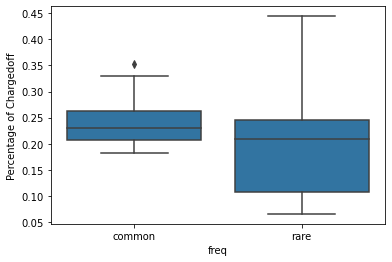

In [119]:
sb.boxplot(data = chargedoff, x = 'freq', y = 'ListingKey', color = base_color)
plt.ylabel('Percentage of Chargedoff')

**Prosper Rating vs. Loan Status**

__Counts__
prosper_rating_alpha  LoanStatus
AA                    Chargedoff      63
                      Completed     1699
A                     Chargedoff     326
                      Completed     3203
B                     Chargedoff     500
                      Completed     2784
C                     Chargedoff     706
                      Completed     2977
D                     Chargedoff    1395
                      Completed     4188
E                     Chargedoff    1131
                      Completed     2506
HR                    Chargedoff    1215
                      Completed     2300
Name: ListingKey, dtype: int64
__Percentage__
prosper_rating_alpha  LoanStatus
AA                    Chargedoff    0.035755
                      Completed     0.964245
A                     Chargedoff    0.092377
                      Completed     0.907623
B                     Chargedoff    0.152253
                      Completed     0.847747
C                     Chargedoff 

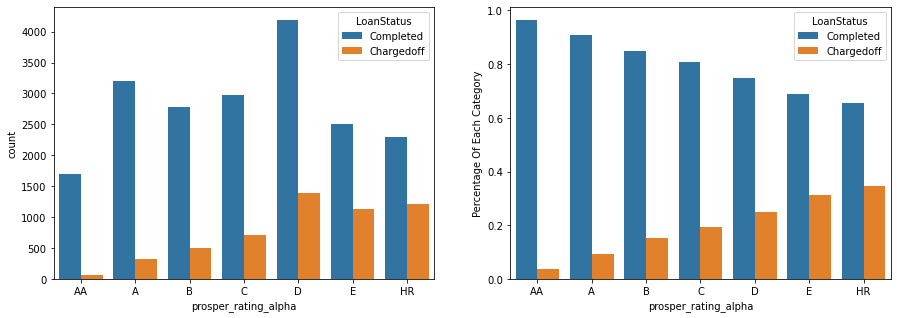

In [120]:
describe_two_categories(clean_prosper_final, 'prosper_rating_alpha', 'LoanStatus', None,
                        ['Completed', 'Chargedoff'], 1, 2, [15, 5], oritentation='v')

The percentage of charged-off loans increases with the increase of Prosper rating. 

**Loan Original Amount vs. Loan Status**

<AxesSubplot:xlabel='LoanStatus', ylabel='LoanOriginalAmount'>

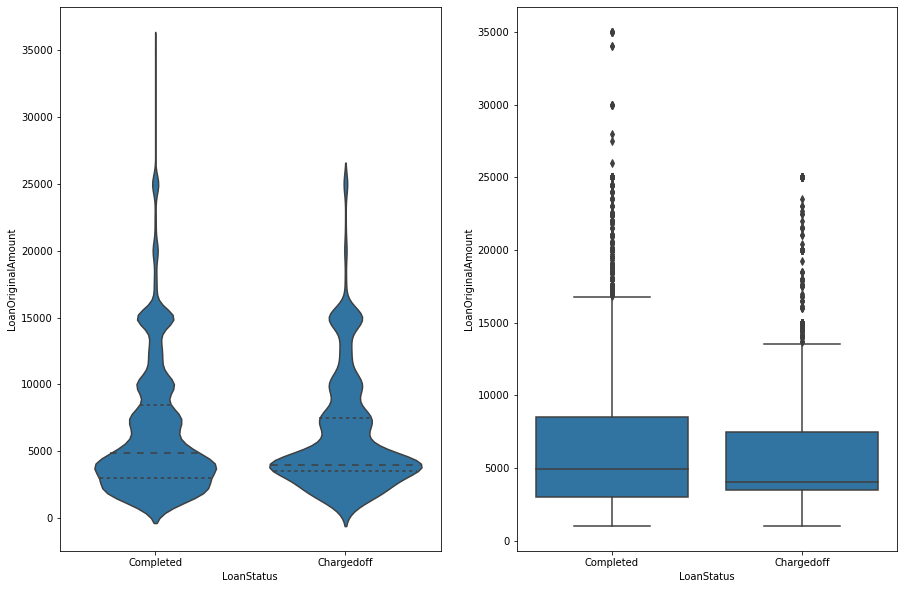

In [121]:
plt.figure(figsize=[15, 10])
plt.subplot(1, 2, 1)
sb.violinplot(data = clean_prosper_final, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color, inner = 'quartile')
# Draw boxplots for an easier comparison 
plt.subplot(1, 2, 2)
sb.boxplot(data = clean_prosper_final, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color)

In [122]:
print('_______COMPLETED LOANS________')
print(clean_prosper[clean_prosper.LoanStatus == 'Completed'].LoanOriginalAmount.describe())
print('_______CHARGED OFF LOANS________')
print(clean_prosper[clean_prosper.LoanStatus == 'Chargedoff'].LoanOriginalAmount.describe())

_______COMPLETED LOANS________
count    19657.000000
mean      6430.179987
std       4903.349082
min       1000.000000
25%       3000.000000
50%       4909.000000
75%       8500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64
_______CHARGED OFF LOANS________
count     5336.000000
mean      6246.962706
std       4412.520557
min       1000.000000
25%       3500.000000
50%       4000.000000
75%       7500.000000
max      25000.000000
Name: LoanOriginalAmount, dtype: float64


The distributions of the loan amount for completed and charged-off loans are similar. They both have the highest density between Q1 and the median. There are also other areas of higher density corresponding to the peaks discovered earlier in the univariate exploration of the loan amount. 

Nevertheless, the median loan amount of charged-off (4000 \\$) loans is smaller than the median of completed loans (4909 \\$). In addition, the distribution of the loan amount for completed loans is more spread out than charged-off loans. 

**Lender Yield vs. Loan Status**

<AxesSubplot:xlabel='LoanStatus', ylabel='LenderYield'>

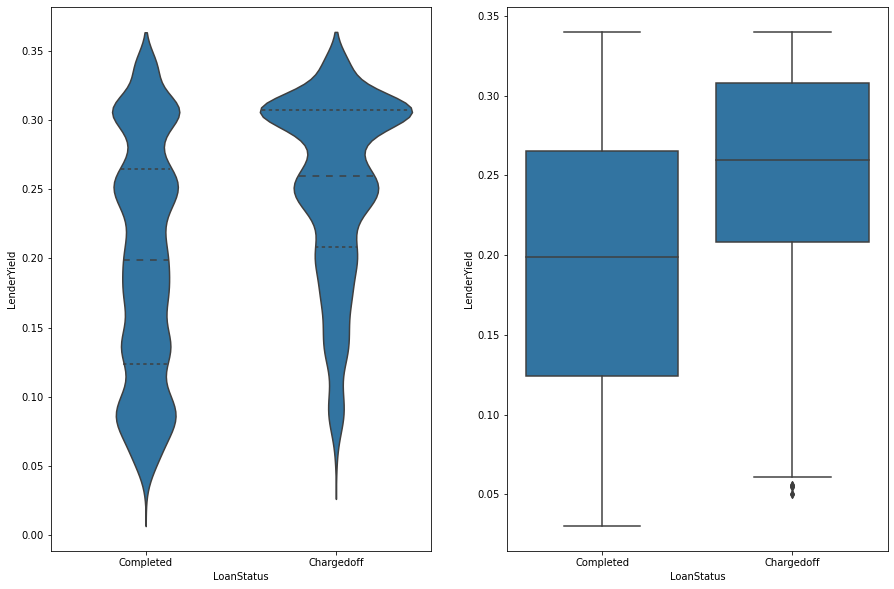

In [123]:
plt.figure(figsize=[15, 10])
plt.subplot(1, 2, 1)
sb.violinplot(data = clean_prosper_final, x = 'LoanStatus', y = 'LenderYield', color = base_color, inner = 'quartile')
# Draw boxplots for an easier comparison 
plt.subplot(1, 2, 2)
sb.boxplot(data = clean_prosper_final, x = 'LoanStatus', y = 'LenderYield', color = base_color)

Supplement the visuals with descriptive statistics of the lender yield for both completed and charged-off loans.

In [124]:
# Get the values of lender yield completed loans
completed = clean_prosper[clean_prosper.LoanStatus == 'Completed'].LenderYield
# Get the values of lender yield for chargedoff loans
chargedoff = clean_prosper[clean_prosper.LoanStatus == 'Chargedoff'].LenderYield
print('_______COMPLETED LOANS________')
print(completed.describe())
print('The IQR is: ' + str(completed.quantile(0.75) - completed.quantile(0.25)))
print('_______CHARGED OFF LOANS________')
print(chargedoff.describe())
print('The IQR is: ' + str(chargedoff.quantile(0.75) - chargedoff.quantile(0.25)))

_______COMPLETED LOANS________
count    19657.000000
mean         0.196689
std          0.085096
min          0.030000
25%          0.124000
50%          0.198900
75%          0.265000
max          0.340000
Name: LenderYield, dtype: float64
The IQR is: 0.14100000000000001
_______CHARGED OFF LOANS________
count    5336.000000
mean        0.250454
std         0.066274
min         0.049900
25%         0.208100
50%         0.259900
75%         0.307700
max         0.340000
Name: LenderYield, dtype: float64
The IQR is: 0.09959999999999997


The distribution of the lender yield for completed loans is slightly left-skewed with areas of high density around 0.25 and 0.3. There is an area of higher density in smaller values between 0.05 and 0.1. There's also a roughly uniform area between 0.1 and 0.25.

The distribution of lender yield for charged-off loans is left-skewed with the highest density around Q3 (0.31), another area of high density around 0.25, and a long tail from 0.25 to 0.05. 

The value of Q1 for charged-off loans (0.20) is higher than the median of completed loans (0.19). This means that 75% of lender yield values for charged-off loans are higher than the median of completed loans.

The values for charged-off loans are also more centered around the median (IQR = 0.09) compared to completed loans (IQR = 0.14).

**Prosper Rating vs. Loan Original Amount**

<AxesSubplot:xlabel='prosper_rating_alpha', ylabel='LoanOriginalAmount'>

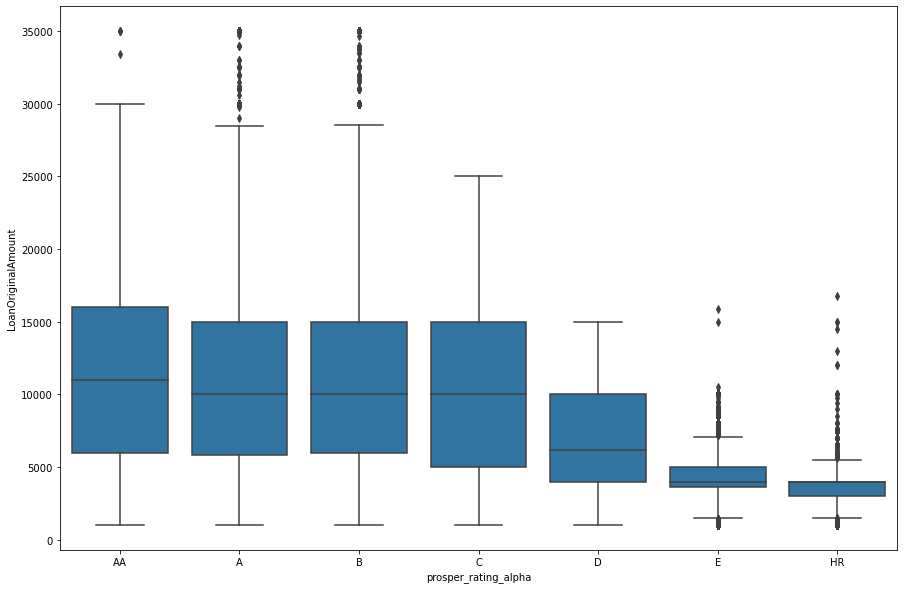

In [125]:
plt.figure(figsize=[15, 10])
sb.boxplot(data = clean_prosper, x='prosper_rating_alpha', y='LoanOriginalAmount', color = base_color)

The values of the distribution of the loan amount decrease slowly from AA to C, then the decrease accelerates from C to HR.

**Propser Rating vs. Term**

__Counts__
prosper_rating_alpha  Term
AA                    12        181
                      36       4490
                      60        700
A                     12        269
                      36      10663
                      60       3618
B                     12        316
                      36       9004
                      60       6260
C                     12        264
                      36      10179
                      60       7900
D                     12        295
                      36       9801
                      60       4172
E                     12        288
                      36       7607
                      60       1894
HR                    12          0
                      36       6932
                      60          0
Name: ListingKey, dtype: int64
__Percentage__
prosper_rating_alpha  Term
AA                    12      0.033699
                      36      0.835971
                      60      0.130330
A               

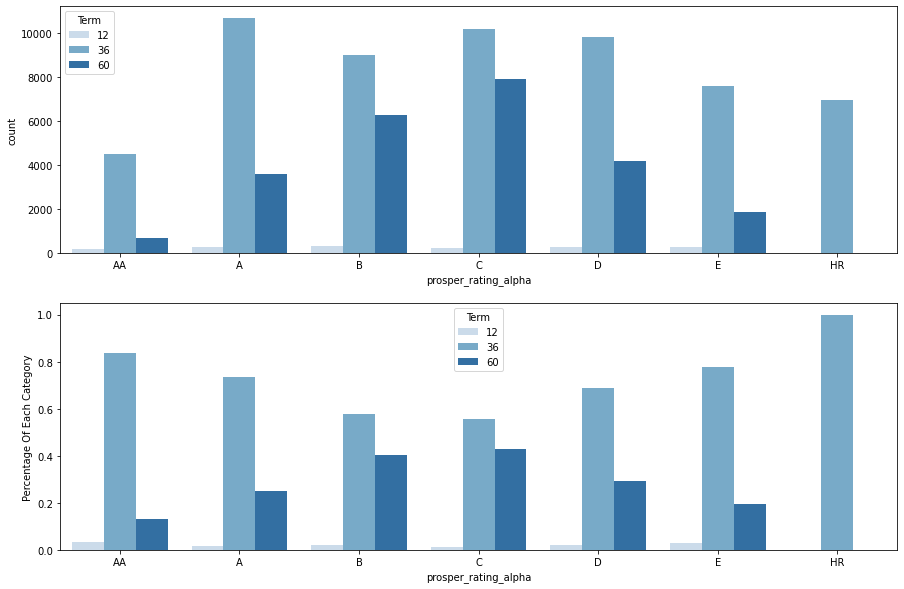

In [126]:
describe_two_categories(clean_prosper, 'prosper_rating_alpha', 'Term', None,
                        None, 2, 1, [15, 10], hue_colors= 'Blues')

The percentage of 60 months term loans increases from AA to C where it reaches its maximum (55.49%), then it decreases from C to E.

The percentage of 36 and 12 months term loans follow the opposite trend.

Note that there is no data about 60 and 12 term loans for HR.

**Prosper Rating vs. Listing Category**

In [127]:
# Get a dataframe with only the common categories
common_df = clean_prosper[clean_prosper.listing_category_alpha.isin(common_cat)]
# Get a dataframe with only the rare categories
rare_df = clean_prosper[~(clean_prosper.listing_category_alpha.isin(common_cat))]

Due to the lack of data for rare listing categories, only the 9 most common categories will be plotted.

__Counts__
listing_category_alpha  prosper_rating_alpha
Auto                    AA                      134
                        A                       352
                        B                       321
                        C                       331
                        D                       489
                                               ... 
Taxes                   B                       139
                        C                       215
                        D                       164
                        E                        96
                        HR                      106
Name: ListingKey, Length: 63, dtype: int64
__Percentage__
listing_category_alpha  prosper_rating_alpha
Auto                    AA                      0.059902
                        A                       0.157354
                        B                       0.143496
                        C                       0.147966
                        D                

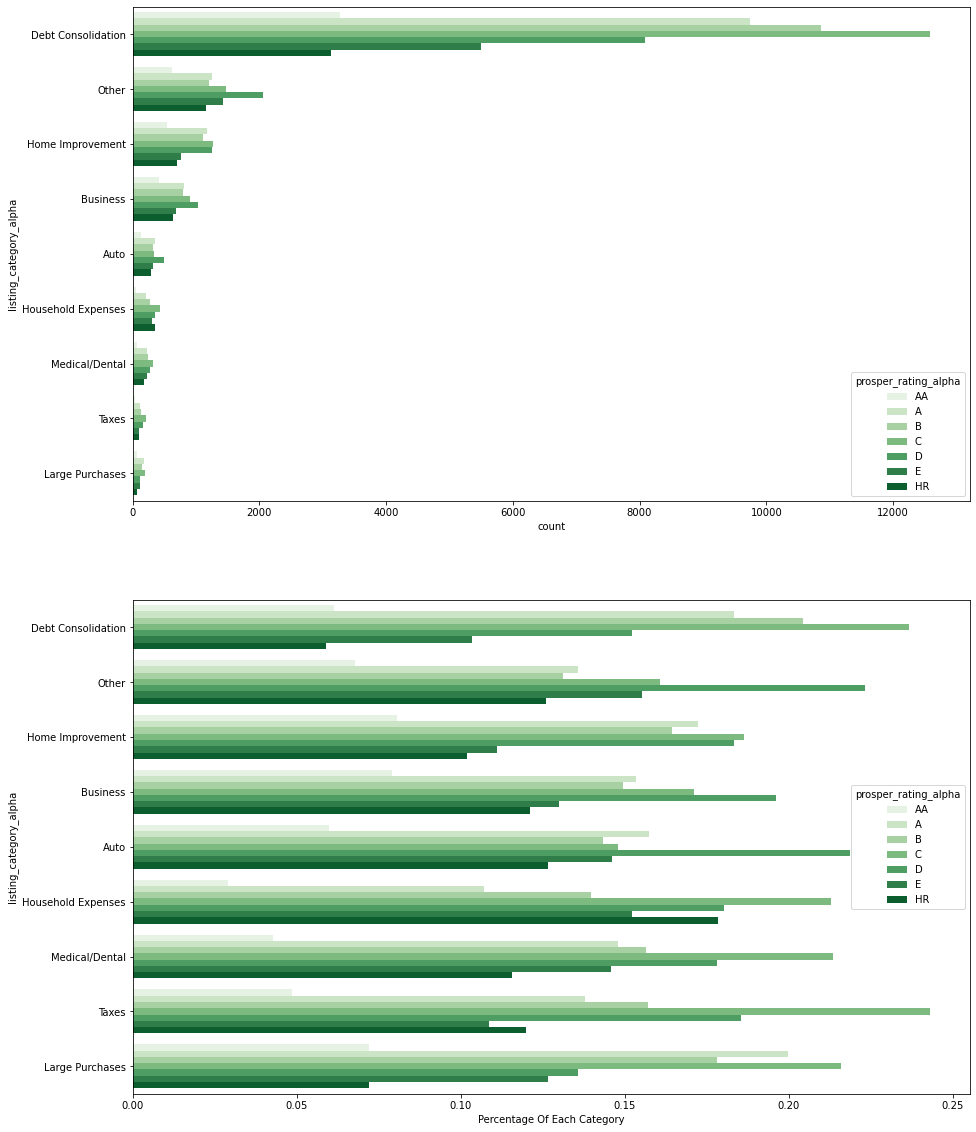

In [128]:
# Use value counts index as the order for creating a countsplot
order = common_df.listing_category_alpha.value_counts().index
describe_two_categories(common_df, 'listing_category_alpha', 'prosper_rating_alpha', order,
                        None, 2, 1, [15, 20], oritentation='h', hue_colors='Greens')

Each listing category has a different combination of Prosper ratings. 

Because HR (high risk) is the rating that is most likely to influence the number of chargedoff loans, a table containing the percentage of HR in each category will be created. It will also be ordered from the lowest to the highest percentage. 

In [129]:
# Get the percentages of prosper rating in each category 
percentages = common_df.groupby(['listing_category_alpha', 'prosper_rating_alpha']).count() / common_df.groupby('listing_category_alpha').count()
percentages = percentages[['ListingKey']]
percentages = percentages.reset_index()
# Extract only the percentages of HR for each category.
category_ranking_by_HR = percentages[percentages.prosper_rating_alpha == 'HR'].sort_values(by = 'ListingKey')
category_ranking_by_HR

,listing_category_alpha,prosper_rating_alpha,ListingKey
20,Debt Consolidation,HR,0.058988
41,Large Purchases,HR,0.071918
27,Home Improvement,HR,0.101897
48,Medical/Dental,HR,0.115637
62,Taxes,HR,0.119774
13,Business,HR,0.121178
55,Other,HR,0.126058
6,Auto,HR,0.126509
34,Household Expenses,HR,0.178357


To compare the interaction of Prosper rating and charged-off percentage on listing categories, the previous ranking of the categories by charged-off percentage will be brought back here. 

Note that categories are also ranked in ascending order.

In [130]:
category_raking_by_chargedoff

,listing_category_alpha,LoanStatus,ListingKey
0,Auto,Chargedoff,0.181662
10,Debt Consolidation,Chargedoff,0.201359
16,Home Improvement,Chargedoff,0.207607
26,Other,Chargedoff,0.211363
31,Taxes,Chargedoff,0.230769
20,Large Purchases,Chargedoff,0.232955
6,Business,Chargedoff,0.262622
22,Medical/Dental,Chargedoff,0.330532
18,Household Expenses,Chargedoff,0.353659


Some categories have the same ranking in both tables (Home Improvement, Medical/Dental, and Household Expenses), others missed their ranking by only one place (Debt Consolidation, Taxes, Business and Other). This suggests that the listing category influences the percentage of charged-off loans indirectly by Prosper rating.

Nevertheless, some categories are far from their expected ranking (Auto, Large Purchases). They have a high percentage of HR but a low percentage of charge-offs. This suggests that the listing category may influence the percentage of charge-offs independently (or by another variable).

**Propser Rating vs. Lender Yield**

<AxesSubplot:xlabel='prosper_rating_alpha', ylabel='LenderYield'>

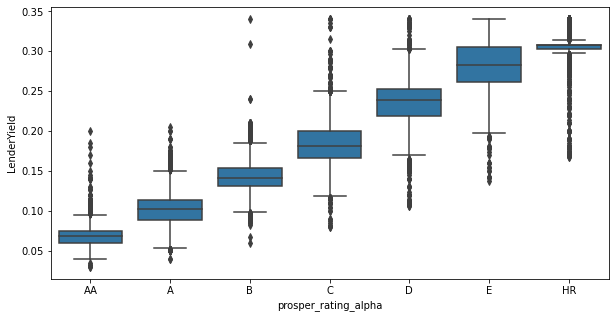

In [131]:
plt.figure(figsize=[10, 5])
sb.boxplot(data = clean_prosper, x = 'prosper_rating_alpha', y = 'LenderYield', color = base_color)

The values of the distribution of lender yield increase with the increase of Prosper rating.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Higher values for the loan term, Prosper rating, and lender yield were associated with a higher percentage of charged-off loans suggesting that they may have a direct influence on the outcome of a loan.

Each listing category had a different percentage of charged-off loans with some loans associated with a higher percentage than others.

The loan amount had the most surprising relationship with loan status. I was expecting bigger loans to be associated with bigger charged-offs but I found the opposite. Riskier loans were associated with lower values for the loan amount.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

From AA to C, the percentage of 60-months term loans increases, and the percentage of 36- and 12-months term loans decreases. From C to HR, the relationship is inverted. The percentage of 60-months term loans decreases and the percentage of 36- and 12-months term loans increases. It’s hard to say how this interaction between Prosper rating and the loan term influences the loan status. We could be tempted to say that the reason why 12-months term loans are associated with a lower number of charged-off loans is that there are many 12-months term loans in AA. However, this would not account for the high number of 12-months loans in HR.

Each listing category has a different percentage of each Prosper rating. Some categories have a higher percentage of risky loans (HR) than others. Some listing categories have a percentage of HR that matches the percentage of charged-off loans. For instance, ‘Household Expenses’ has both the highest percentage of HR and the highest percentage of charged-off loans. In contrast, some loans have a high percentage of HR but a low percentage of charged-off loans. For example, ‘Auto’ has the second to the highest percentage of HR but the lowest percentage of charged-off loans. These results suggest that the relationship between the listing category and the loan status can be partially explained by the interaction between the listing category and Prosper rating.

The loan amount decreases with the increase of Prosper rating. This result matches the relationship between the loan amount the number of charged-off loans and suggests that the change in Prosper rating can explain the change of the number of charged-off loans for the loan amount.

The relationship between the lender yield and Prosper rating matches its relationship with the loan status. Higher lender yield values are associated with higher Prosper ratings and more charged-off loans. This interaction suggests that the lender yield influences loan status indirectly through Prosper rating.

<a id = 'multi-exploration'></a>
## Multivariate Exploration

Prosper rating is a proprietary system used to assess the estimated loss rates associated with a specific loan. It is based on the borrower's Credit Score (provided by an official credit reporting agency) and the Prosper Score. The Prosper Score takes into account many user characteristics including the number of trades, the number of delinquent accounts, the number of inquiries, the number of recently opened trades, the amount of available credit on bank cards, and bankcard utilization as stated [here](https://www.prosper.com/help/topics/general-prosper_score.aspx).

In the bivariate analysis, a higher Prosper Rating was associated with a higher percentage of charged-off loans. I also discovered that it interacted with the other variables that influenced the percentage of charged-off loans (term, listing category, lender yield, and loan amount). In this part, I want to know if Prosper Rating can explain all the variation of the percentage of charged-off loans or do the other variables influence the loan status independently?


**Propser Rating vs. Term vs. Loan Status**

C:\Users\ACER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


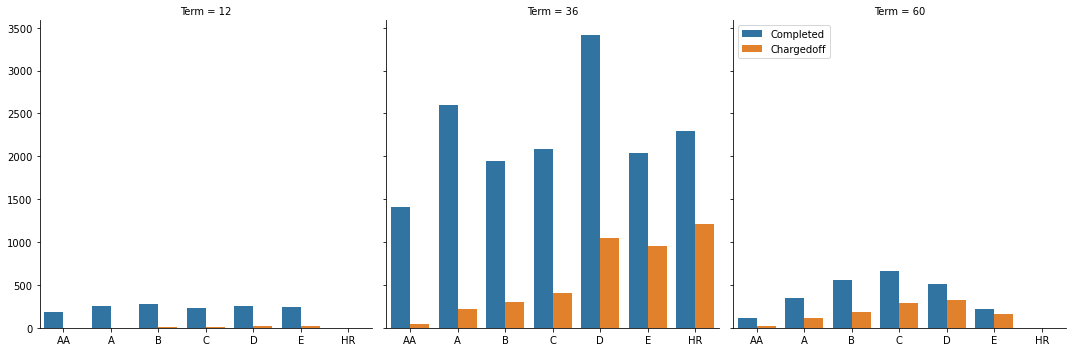

In [132]:
fg = sb.FacetGrid(data = clean_prosper_final, col = 'Term', size = 5)
fg.map_dataframe(sb.countplot, x = 'prosper_rating_alpha', hue = 'LoanStatus', palette = sb.color_palette("tab10"))
plt.legend()

There's much less data for 12-months terms and 60-months terms than 36-month terms.

Because the outcome of a loan is binary (completed and charged off), it can be represented with a 1 for charged-off loans and a 0 for completed loans. The advantage of this is that the mean of the outcome will be the percentage of charged-off loans. This trick will come in handy for the following analysis where the percentage of charged-off loans will be required several times.

In [133]:
# Use 1 for chargedoff loans and 0 for completed loans. 
clean_prosper_final['is_chargedoff'] = clean_prosper_final.LoanStatus.apply(lambda x: 1 if x == 'Chargedoff' else 0)

C:\Users\ACER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Percentage of Chargedoff Loans')

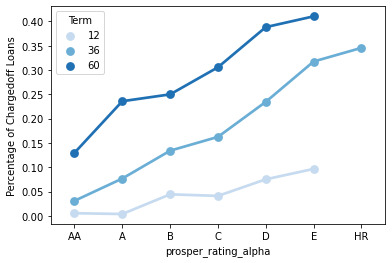

In [134]:
sb.pointplot(data = clean_prosper_final, x = 'prosper_rating_alpha', y = 'is_chargedoff'
             , hue = 'Term', palette='Blues', ci = None)

plt.ylabel('Percentage of Chargedoff Loans')

The percentage of charged-off loans increases with the increase of Prosper Rating and the increase of the loan term. This means that the term influences the percentage of charged-off loans independently from Prosper Rating.

**Prosper Rating vs. Listing Category vs. Loan Status**

Plotting the 19 listing categories of `clean_prosper_final` in a single chart is not possible. In the univariate and bivariate exploration, the listing categories were divided into 9 common categories and 10 rarer categories.

This division will be used for the plots below: 

In [135]:
# Get a dataframe with only the common categories
common_df = clean_prosper_final[clean_prosper_final.listing_category_alpha.isin(common_cat)]

Text(0, 0.5, 'Percentage of Chargedoff Loans')

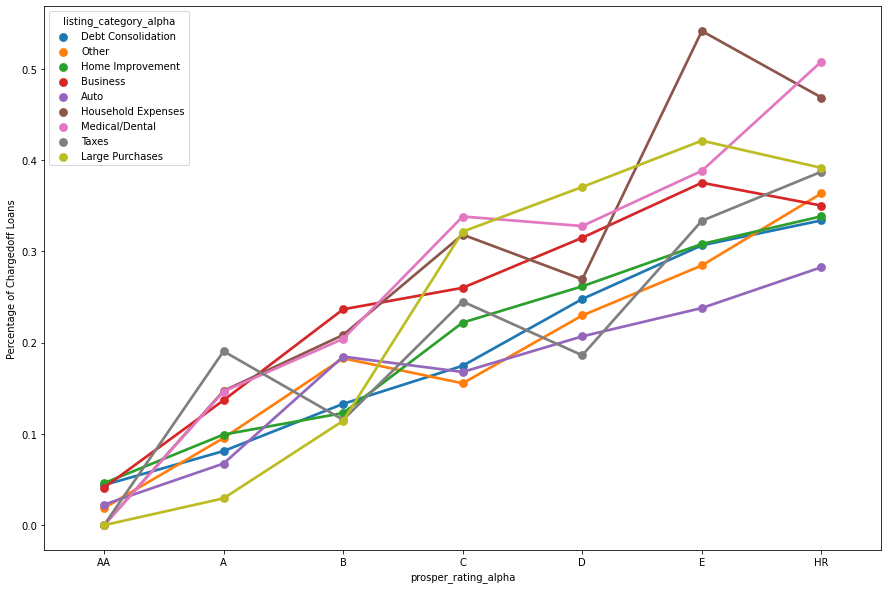

In [136]:
plt.figure(figsize=[15, 10])
order = common_df.listing_category_alpha.value_counts().index
sb.pointplot(data = common_df, x = 'prosper_rating_alpha', y = 'is_chargedoff', hue = 'listing_category_alpha',
             ci = None, palette = "tab10", hue_order=order)
plt.ylabel('Percentage of Chargedoff Loans')

The percentage of chargeoffs increases for each listing category with the increase of Prosper rating. However, the ranking of the categories is different from a prosper rating to another. For example: 'Large Purchases' category had the least percentage of chargeoffs in AA but became the second in E. 

There are also some categories where the percentage of charge-off loans decreased with the increase of Prosper rating. For example, the percentage of charged-off loans in A for 'Taxes' decreased in B.

**Propser Rating vs. Lender Yield vs. Loan Status**

<AxesSubplot:xlabel='prosper_rating_alpha', ylabel='LenderYield'>

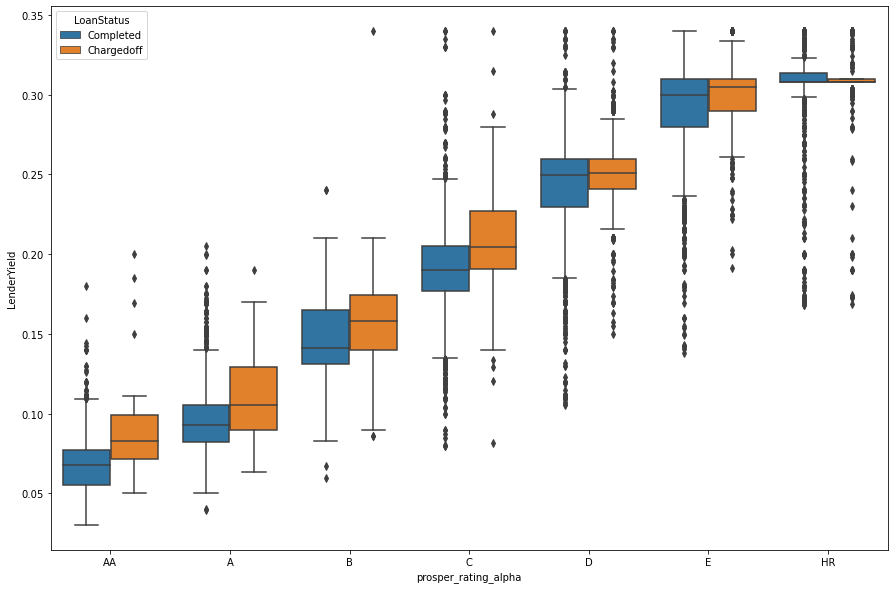

In [137]:
plt.figure(figsize=[15, 10])
sb.boxplot(data = clean_prosper_final, x = 'prosper_rating_alpha', y = 'LenderYield', hue = 'LoanStatus')

The distribution of lender yield for both completed and charged-off loans is shifted upwards with the increase of Prosper rating. 

From AA to C, the distribution of charged-off loans has higher lender yield values. The Q1 of the charged-off distribution is higher or equal to the median of the distribution of completed loans.

From D to HR, the difference between the distribution of lender yield for charged-off and completed loans is weaker. The median lender yield for charged-off loans is still higher but the Q1 is lower than the median lender yield for completed loans.

**Prosper Rating vs. Loan Original Amount vs. Loan Status**

<AxesSubplot:xlabel='prosper_rating_alpha', ylabel='LoanOriginalAmount'>

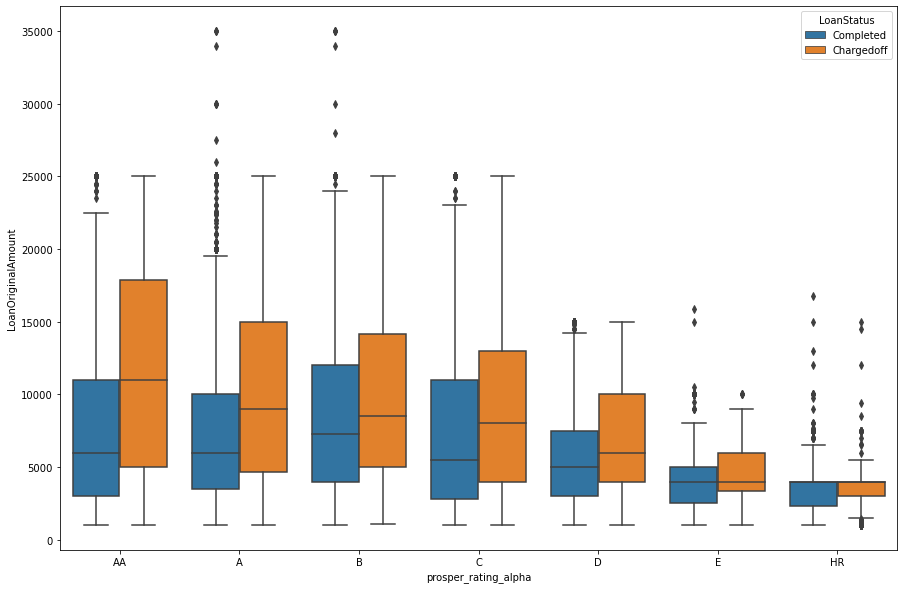

In [138]:
plt.figure(figsize=[15, 10])
sb.boxplot(data = clean_prosper_final, x = 'prosper_rating_alpha', y = 'LoanOriginalAmount', hue = 'LoanStatus')

The values of the distribution of loan original amount for charged-off loans decreased with the increase of Prosper rating. 

The median of the distribution of loan original amount for charged-off loans is bigger than the median of completed loans but this difference decreases (except in B where there was an increase) with the increase of Prosper rating until E where the two medians are almost equal.

**Propser Rating vs. Lender Yield vs. Term vs. Loan Status**

C:\Users\ACER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


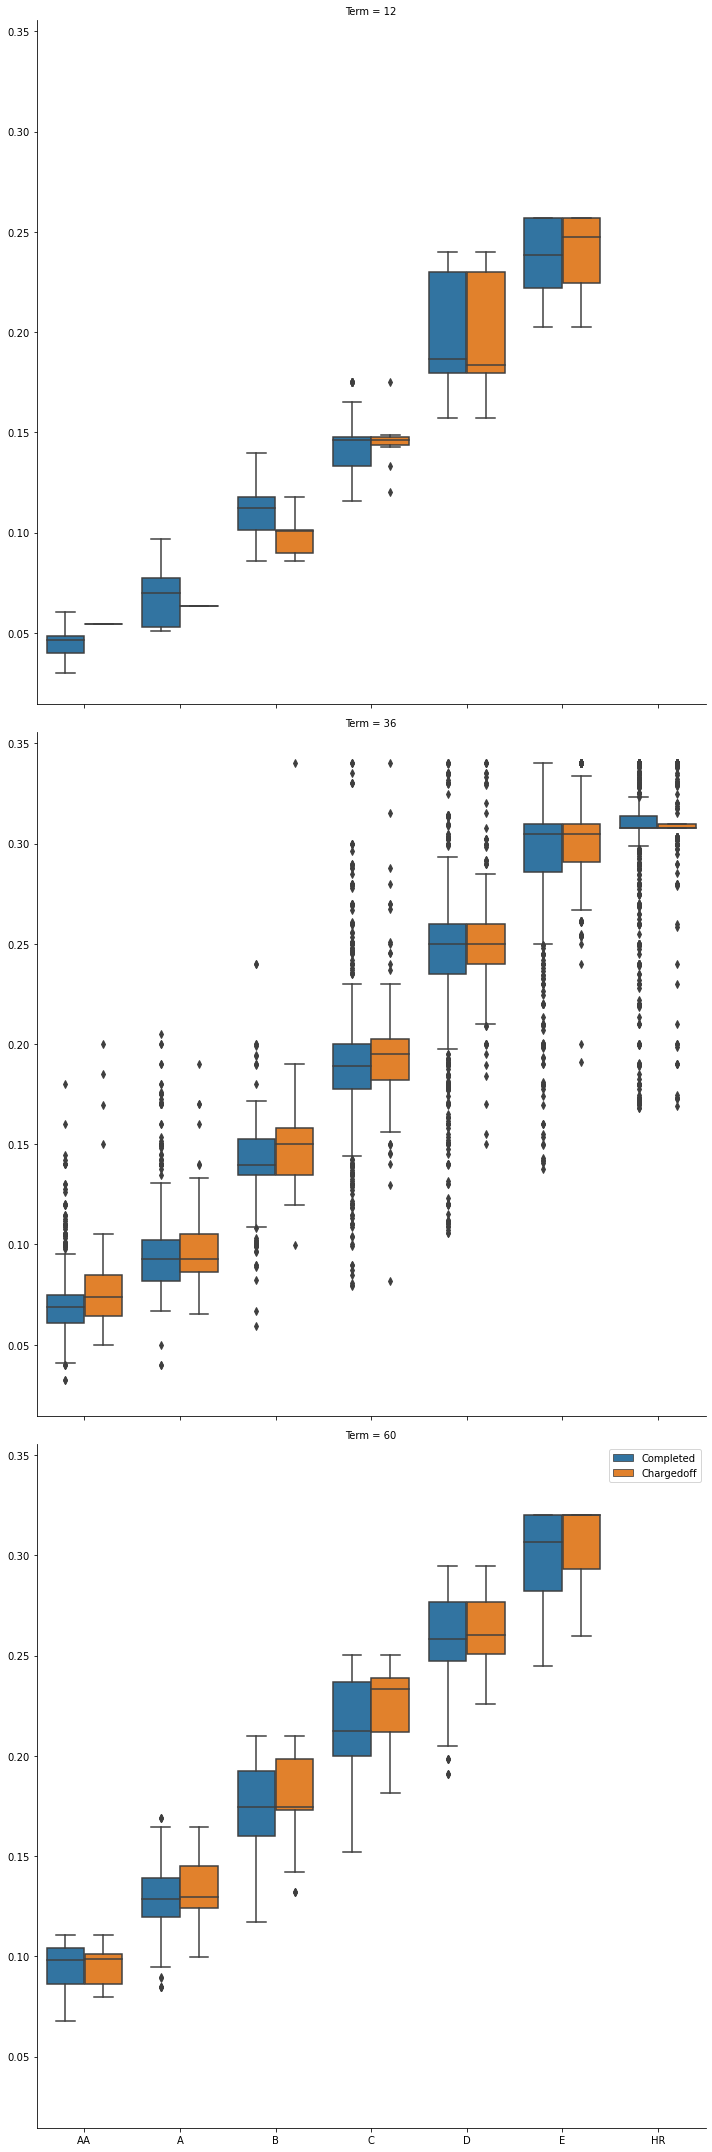

In [139]:
fg = sb.FacetGrid(data = clean_prosper_final, row = 'Term', size = 10)
fg.map_dataframe(sb.boxplot, x = 'prosper_rating_alpha', y = 'LenderYield', hue = 'LoanStatus', palette = "tab10")
plt.legend()

The relationship between the distribution of lender yield for completed/charged-off loans and prosper rating is consistent across all the values of the term. For each increase in prosper rating, there's an upward shift in the distribution of lender yield.

The starting point of the distribution of the lender yield for both completed and charged-off loans increases with the increase of the term.    

For 12 months term, there's not enough data for AA and A. In B the median (also corresponding to Q3) of the distribution of lender yield for charged-off loans is lower than Q1 of completed loans. For C, the medians of both distributions are almost equal. For D, the median of the distribution of lender yield for charged-off loans is lower than the median of completed loans. For E, the median of the distribution of lender yield for charged-off loans is higher than the median of completed loans.

Note that the data for 12 months is scarce and dividing it, further along, Prosper ratings worsens further this lack. That's why the results for this loan term should be taken with caution. 

For 36 months term and from AA to HR, Q1 of the distribution of lender yield for charged-off loans is lower than the median of completed loans. The medians of both distributions are almost equal in A, D, and E

For 60 months term, Q1 of the distribution of lender yield for charged-off loans is lower than the median of completed loans in all prosper ratings except in C where it's almost equal to the median. The medians of both distributions are almost equal in AA and B.

**Propser Rating vs. Lender Yield vs. Term vs. Listing Category vs. Loan Status**

C:\Users\ACER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


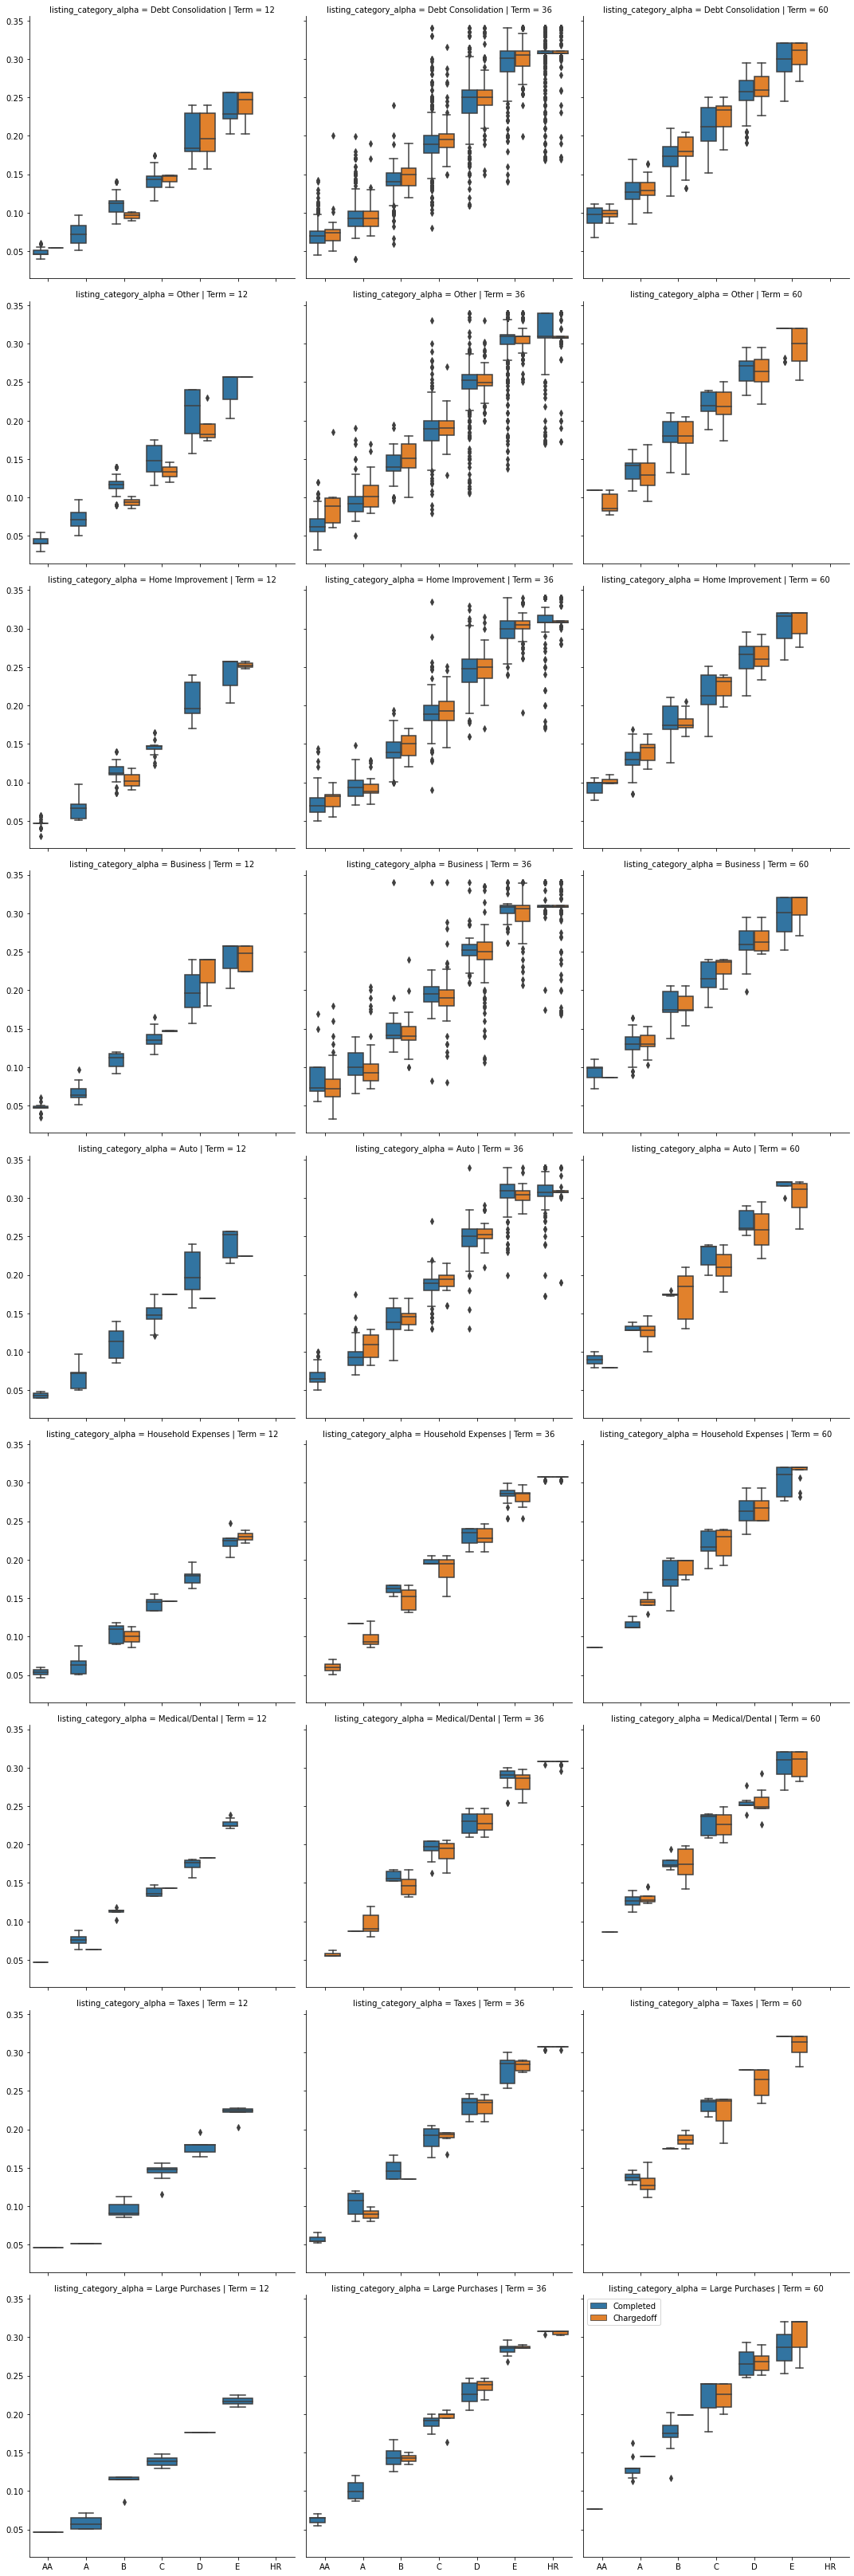

In [141]:
fg = sb.FacetGrid(data = common_df, row = 'listing_category_alpha', col = 'Term', row_order = common_cat ,size = 5)
fg.map_dataframe(sb.boxplot, x = 'prosper_rating_alpha', y = 'LenderYield', hue = 'LoanStatus' ,palette = "tab10")
plt.legend()

The relationship between the distribution of lender yield for completed/charged-off loans and prosper rating is consistent across all the values of term and all the values of listing category. For each increase in prosper rating, there's an upward shift in the distribution of lender yield.

Debt Consolidation seems to have the same pattern that was observed before adding the listing category variable to the plot.

Regardless of the term, Prosper rating, and the listing category, the median of the distribution of charged-off loans can be higher, lower or equal to the median of completed loans. The Q1 of the distribution of charged-off loans can be lower or equal to the median of completed loans.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

For each Prosper Rating, the increase of the term increased the percentage of charged-off loans meaning that its influence is independent of the Prosper rating.

There was an interaction between Prosper rating and the listing category. The ranking of the categories according to the percentage of charged-off loans changed from a Prosper rating to another. If a category had the least percentage of charged-off loans in a rating, it could have the highest in another one. The percentage of charged-off loans for a category can decrease from a low rating to a higher one but the overall trend is that the percentage of charged-off loans increases with the Prosper rating even if there’s a change in the ranking of the categories. This result can explain why some categories with a high percentage of HR loans can keep a low percentage of charged-off loans.

The distribution of the lender yield for charged-off loans is higher than the distribution of completed loans from AA to C then both distributions start overlapping from C to HR. If Prosper rating explained all the variation in lender yield, we would not see the difference between completed and charged-off loans.

To test for even more interactions, I decided to use the plot of “lender yield vs. Prosper rating vs. Loan Status” for the facets of the loan term and the listing category. When the term was introduced, I noticed that the starting point of the distribution of lender yield increased with the term but it did not influence its relationship with the loan status. When I added the listing category, I noticed that each category for each term had a different pattern and that even within the same facets, there was not a clear trend. The distribution of the lender yield for charged-off loans can be superior, similar, or inferior to the distribution of completed loans. Nonetheless, “Debt Consolidation” had the same pattern that I observed before adding the listing category. This means that the overall pattern that we got before was just the pattern of this listing category since it represents 62.68% of all the data.



### Were there any interesting or surprising interactions between features?

There was an interaction between the loan amount, Prosper rating, and the loan status. In the bivariate analysis, lower loan amounts were associated with a high number of charged-off loans but after adding Propser rating to the plot, the relationship was inverted. For each prosper rating the distribution of the loan amount for charged-off loans is higher than the distribution of completed loans until HR where they overlap.